# Suriname Correlaid project
Analysis on rain data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.getcwd()
os.chdir(r"C:\Users\valer\OneDrive\Dokumente\CVs _ Applications\Correlaid 2021")

In [69]:
import seaborn as sns

In [3]:
rain = pd.read_csv("rain_adm1_data (1).csv", delimiter = ",")

In [4]:
rain.shape

(4724, 13)

In [5]:
rain[:2]

,Indicator,Country,ADM1_CODE,Province,Land_Type,Date,Data,Data_long_term_Average,Year,Month,Dekad,Unit,Source
0,RS-Based Estimated Precipitation,Suriname,2772,Commewijne,Crop Area,1989-01-01,74.0,60.0,1989,1,1,MM,ECWMF
1,RS-Based Estimated Precipitation,Suriname,2772,Commewijne,Crop Area,1989-01-11,97.0,58.0,1989,1,2,MM,ECWMF


In [6]:
rain["Indicator"].unique()
rain["Province"].unique()
rain["Land_Type"].unique()

array(['Crop Area'], dtype=object)

In [7]:
#Show unique values to remove columns that only have one value

for column in rain:
    print(column)
    print(rain[column].unique())

Indicator
['RS-Based Estimated Precipitation']
Country
['Suriname']
ADM1_CODE
[2772 2775 2778 2780]
Province
['Commewijne' 'Nickerie' 'Saramacca' 'Wanica']
Land_Type
['Crop Area']
Date
['1989-01-01' '1989-01-11' '1989-01-21' ... '2021-10-01' '2021-10-11'
 '2021-10-21']
Data
[ 74.     97.     69.     82.     50.     42.     22.    114.     45.
  49.     57.     76.     98.    109.     73.     55.     63.     85.
  64.     44.     26.     19.     12.     39.     47.     52.     34.
  91.     43.     33.    104.    105.     94.     80.      6.     84.
  24.     83.    102.     81.     90.     51.     56.     28.     37.
  29.     27.     18.     35.     15.     25.     20.     66.     59.
  58.    112.     71.     75.     46.     14.     13.     11.     16.
  60.     31.     67.     53.     30.      7.      1.      9.      3.
  17.     21.     36.     41.     77.     72.     78.     32.     23.
  38.     93.     62.    113.     54.    107.     89.     10.     70.
  65.    122.    125.    

In [8]:
#select interesting columns to analyse

rain_select = rain[["Province", "Date", "Data", "Data_long_term_Average", "Year", "Month", "Dekad"]]

In [9]:
#select 2021 to analyse

rain_select = rain_select[rain_select["Year"] == 2021]

In [10]:
print(rain_select.shape)

(116, 7)


### Start creating the plots

In [11]:
import matplotlib.pyplot as plt

In [12]:
#Combine month and dekad

rain_select["Month_Dekad"] = rain_select["Month"] + rain_select["Dekad"]
#rain_select = rain_select.rename(columns = {"month_dekad": "Month_Dekad"})

In [13]:
rain_select["Date"] = pd.to_datetime(rain_select["Date"], format = "%Y-%m-%d")

In [14]:
rain_select.dtypes

Province                          object
Date                      datetime64[ns]
Data                             float64
Data_long_term_Average           float64
Year                               int64
Month                              int64
Dekad                              int64
Month_Dekad                        int64
dtype: object

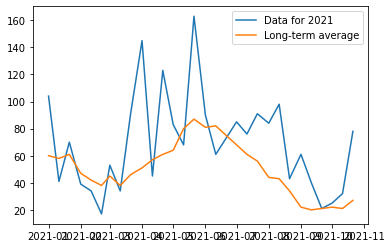

In [15]:
Commewijne = rain_select[rain_select["Province"] == "Commewijne"]

plt.plot(Commewijne["Date"], Commewijne["Data"])
plt.plot(Commewijne["Date"], Commewijne["Data_long_term_Average"])
plt.legend(["Data for 2021", "Long-term average"])


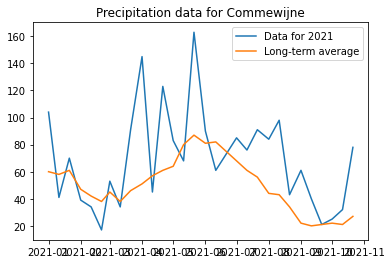

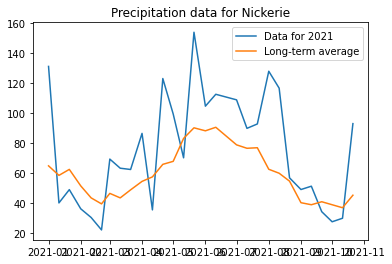

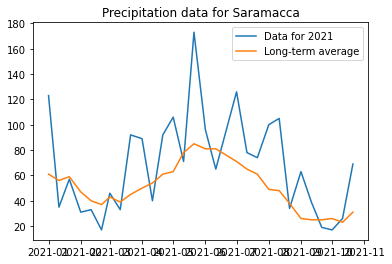

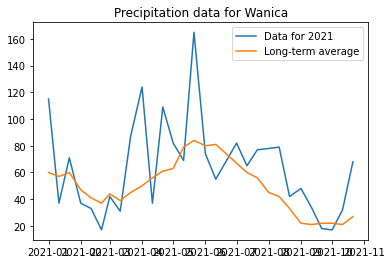

In [16]:
for province in rain_select["Province"].unique():
    province_data = rain_select[rain_select["Province"] == province]
    plt.plot(province_data["Date"], province_data["Data"])
    plt.plot(province_data["Date"], province_data["Data_long_term_Average"])
    plt.title("Precipitation data for " + province)
    plt.legend(["Data for 2021", "Long-term average"])
    plt.show()

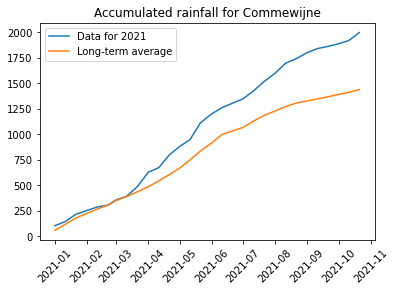

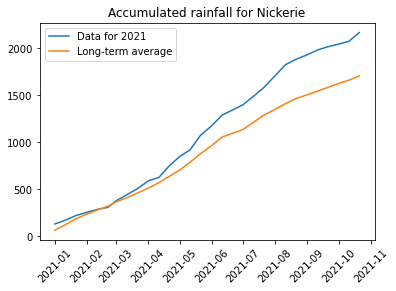

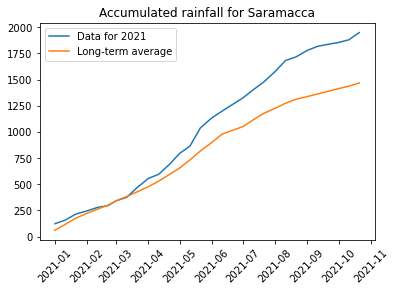

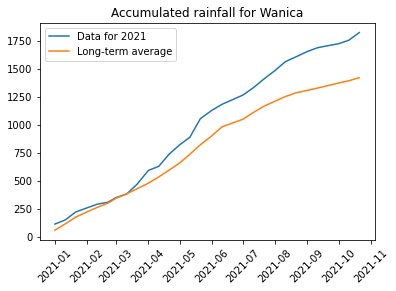

In [89]:
for province in rain_select["Province"].unique():
    province_data = rain_select[rain_select["Province"] == province]
    plt.plot(province_data["Date"], province_data["Data"].cumsum())
    plt.plot(province_data["Date"], province_data["Data_long_term_Average"].cumsum())
    plt.title("Accumulated rainfall for " + province)
    plt.legend(["Data for 2021", "Long-term average"])
    plt.xticks(rotation = 45)
    plt.show()

### Plot all four provinces combined

Need to change from long to wide format

In [17]:
rain_wide = rain_select.pivot(index = "Date", columns = "Province", values = ["Data", "Data_long_term_Average"])

In [18]:
rain_wide.shape

(29, 8)

In [19]:
rain_wide.dtypes

                        Province  
Data                    Commewijne    float64
                        Nickerie      float64
                        Saramacca     float64
                        Wanica        float64
Data_long_term_Average  Commewijne    float64
                        Nickerie      float64
                        Saramacca     float64
                        Wanica        float64
dtype: object

In [20]:
rain_wide["Data_all"] = rain_wide["Data"]["Commewijne"] +  rain_wide["Data"]["Nickerie"] + rain_wide["Data"]["Saramacca"] + rain_wide["Data"]["Wanica"]

In [21]:
rain_wide.head()

Data                           Data_long_term_Average  \
Province   Commewijne Nickerie Saramacca Wanica             Commewijne   
Date                                                                     
2021-01-01      104.0  131.000     123.0  115.0                   60.0   
2021-01-11       41.0   40.000      35.0   37.0                   58.0   
2021-01-21       70.0   48.857      57.0   71.0                   61.0   
2021-02-01       39.0   36.071      31.0   37.0                   47.0   
2021-02-11       34.0   30.286      33.0   33.0                   42.0   

                                     Data_all  
Province   Nickerie Saramacca Wanica           
Date                                           
2021-01-01   64.714      61.0   60.0  473.000  
2021-01-11   58.357      56.0   57.0  153.000  
2021-01-21   62.357      59.0   60.0  246.857  
2021-02-01   51.357      47.0   47.0  143.071  
2021-02-11   43.357      40.0   41.0  130.286

In [22]:
rain_wide["Data_avg_all"] = rain_wide["Data_long_term_Average"]["Commewijne"] +  rain_wide["Data_long_term_Average"]["Nickerie"] + rain_wide["Data_long_term_Average"]["Saramacca"] + rain_wide["Data_long_term_Average"]["Wanica"]

In [23]:
rain_wide.reset_index(level=0, inplace=True)

In [24]:
#rain_wide["Date"] = rain_wide["Date"].astype(str)


In [25]:
#rain_wide["Date"] = rain_wide["Date"].str.replace("2021-", "")

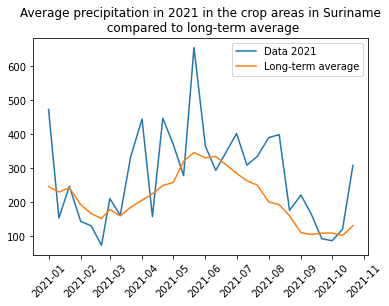

In [26]:
plt.plot(rain_wide["Date"], rain_wide["Data_all"])
plt.plot(rain_wide["Date"], rain_wide["Data_avg_all"])
plt.title("Average precipitation in 2021 in the crop areas in Suriname\n compared to long-term average")
plt.legend(["Data 2021", "Long-term average"])
plt.xticks(rotation = 45)
plt.show()

In [27]:
rain_wide

Date       Data                            \
Province            Commewijne Nickerie Saramacca Wanica   
0        2021-01-01      104.0  131.000     123.0  115.0   
1        2021-01-11       41.0   40.000      35.0   37.0   
2        2021-01-21       70.0   48.857      57.0   71.0   
3        2021-02-01       39.0   36.071      31.0   37.0   
4        2021-02-11       34.0   30.286      33.0   33.0   
5        2021-02-21       17.0   22.000      17.0   17.0   
6        2021-03-01       53.0   69.214      46.0   42.0   
7        2021-03-11       34.0   63.143      33.0   31.0   
8        2021-03-21       91.0   62.286      92.0   87.0   
9        2021-04-01      145.0   86.357      89.0  124.0   
10       2021-04-11       45.0   35.357      40.0   37.0   
11       2021-04-21      123.0  122.929      92.0  109.0   
12       2021-05-01       83.0   99.286     106.0   82.0   
13       2021-05-11       68.0   70.071      71.0   69.0   
14       2021-05-21      163.0  153.786     173.0  165.0   
15       2021-06-01       90.0  104.500      96.0   74.0   
16       2021-06-11       61.0  112.429      65.0   55.0   
17       2021-07-01       85.0  108.714     126.0   82.0   
18       2021-07-11       76.0   89.714      78.0   65.0   
19       2021-07-21       91.0   92.643      74.0   77.0   
20       2021-08-01       84.0  127.786     100.0   78.0   
21       2021-08-11       98.0  116.500     105.0   79.0   
22       2021-08-21       43.0   56.714      34.0   42.0   
23       2021-09-01       61.0   48.929      63.0   48.0   
24       2021-09-11       40.0   51.143      39.0   34.0   
25       2021-09-21       21.0   34.143      19.0   18.0   
26       2021-10-01       25.0   27.429      17.0   17.0   
27       2021-10-11       32.0   29.786      26.0   32.0   
28       2021-10-21       78.0   92.857      69.0   68.0   

         Data_long_term_Average                           Data_all  \
Province             Commewijne Nickerie Saramacca Wanica            
0                          60.0   64.714      61.0   60.0  473.000   
1                          58.0   58.357      56.0   57.0  153.000   
2                          61.0   62.357      59.0   60.0  246.857   
3                          47.0   51.357      47.0   47.0  143.071   
4                          42.0   43.357      40.0   41.0  130.286   
5                          38.0   39.357      37.0   37.0   73.000   
6                          45.0   46.357      43.0   44.0  210.214   
7                          38.0   43.357      39.0   39.0  161.143   
8                          46.0   48.714      45.0   45.0  332.286   
9                          51.0   54.357      50.0   50.0  444.357   
10                         57.0   57.357      54.0   56.0  157.357   
11                         61.0   65.714      61.0   61.0  446.929   
12                         64.0   67.714      63.0   63.0  370.286   
13                         80.0   83.000      78.0   79.0  278.071   
14                         87.0   90.071      85.0   84.0  654.786   
15                         81.0   88.071      81.0   80.0  364.500   
16                         82.0   90.429      81.0   81.0  293.429   
17                         68.0   78.714      71.0   67.0  401.714   
18                         61.0   76.429      65.0   60.0  308.714   
19                         56.0   76.786      61.0   56.0  334.643   
20                         44.0   62.429      49.0   45.0  389.786   
21                         43.0   59.786      48.0   42.0  398.500   
22                         34.0   54.500      38.0   33.0  175.714   
23                         22.0   40.143      26.0   22.0  220.929   
24                         20.0   38.786      25.0   21.0  164.143   
25                         21.0   40.786      25.0   22.0   92.143   
26                         22.0   38.786      26.0   22.0   86.429   
27                         21.0   36.786      23.0   21.0  119.786   
28                         27.0   45.143      31.0   2

In [28]:
#Aggregated rainfall (for all regions)

rain_wide["Data_cumulative"] = rain_wide["Data_all"].cumsum()
rain_wide["Data_avg_cumulative"] = rain_wide["Data_avg_all"].cumsum()